<a href="https://colab.research.google.com/github/f-amerehi/bug-free-pytorch-and-Tensorflow/blob/main/Utility_function_shuffle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import random
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


Function to horizontally cut and shuffle the image:

In [38]:

def horizontal_cut_and_shuffle(img, n):
    height = img.size(1)
    width = img.size(2) // n
    shuffled_pieces = []

    for i in range(n):
        piece = img[:, :, i * width: (i + 1) * width]
        shuffled_pieces.append(piece)

    random.shuffle(shuffled_pieces)

    # Rearrange the shuffled pieces
    shuffled_image = torch.cat(shuffled_pieces, dim=2)
    return shuffled_image


Function to vertically cut and shuffle the image

In [39]:
def vertical_cut_and_shuffle(img, n):
    height = img.size(1) // n
    width = img.size(2)
    shuffled_pieces = []

    for i in range(n):
        piece = img[:, i * height: (i + 1) * height, :]
        shuffled_pieces.append(piece)

    random.shuffle(shuffled_pieces)

    # Rearrange the shuffled pieces
    shuffled_image = torch.cat(shuffled_pieces, dim=1)
    return shuffled_image


Function to cut and shuffle the image into nxn smaller pieces

In [40]:
def checkerboard_cut_and_shuffle(img, n):
    height, width = img.size(1), img.size(2)
    piece_height, piece_width = height // n, width // n
    shuffled_pieces = []

    for i in range(n):
        for j in range(n):
            piece = img[:, i * piece_height: (i + 1) * piece_height, j * piece_width: (j + 1) * piece_width]
            shuffled_pieces.append(piece)

    random.shuffle(shuffled_pieces)

    # Rearrange shuffled pieces
    shuffled_image = torch.zeros_like(img)
    idx = 0
    for i in range(n):
        for j in range(n):
            shuffled_image[:, i * piece_height: (i + 1) * piece_height, j * piece_width: (j + 1) * piece_width] = shuffled_pieces[idx]
            idx += 1

    return shuffled_image


In [41]:
def plot_images(images, n):
    fig, axes = plt.subplots(1, n, figsize=(12, 6))

    for i in range(n):
        image = images[i].permute(1, 2, 0).cpu().numpy()
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()

Small example

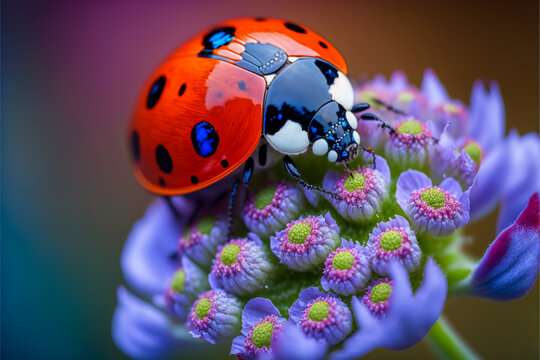

In [42]:
# Assuming you have your image as a PyTorch tensor (C x H x W)
image = torch.randn(3, 128, 128)

url = 'https://t3.ftcdn.net/jpg/05/57/73/24/360_F_557732439_jQDlg9VwJDR7sZOj2urhhAZhAJ03oJVR.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image



In [43]:
# PIL image to a PyTorch tensor
transform = transforms.ToTensor()
image_tensor = transform(image)

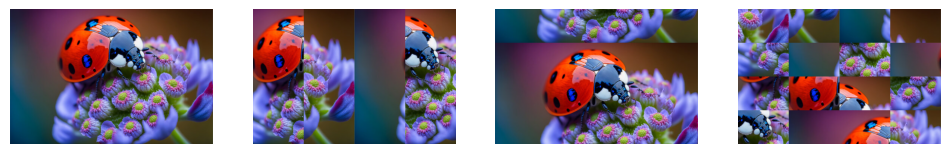

In [44]:
n = 4
shuffled_horizontal = horizontal_cut_and_shuffle(image_tensor, n)
shuffled_vertical = vertical_cut_and_shuffle(image_tensor, n)
shuffled_checkerboard = checkerboard_cut_and_shuffle(image_tensor, n)

plot_images([image_tensor, shuffled_horizontal, shuffled_vertical, shuffled_checkerboard], 4)